## Veriyi Anlamak

In [291]:
# Gerekli Olan Kütüphaneler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Veri Setinin Yüklenmesi

In [292]:
df = pd.read_excel(".archinternational-airline-passengers.xlsx")

In [293]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01-01 00:00:00,112.0
1,1949-02-01 00:00:00,118.0
2,1949-03-01 00:00:00,132.0
3,1949-04-01 00:00:00,129.0
4,1949-05-01 00:00:00,121.0


In [294]:
df.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [295]:
df.columns = ["Month","Passengers"]

In [296]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [297]:
df.head()

,Month,Passengers
0,1949-01-01 00:00:00,112.0
1,1949-02-01 00:00:00,118.0
2,1949-03-01 00:00:00,132.0
3,1949-04-01 00:00:00,129.0
4,1949-05-01 00:00:00,121.0


In [298]:
df.tail()

,Month,Passengers
141,1960-10-01 00:00:00,461.0
142,1960-11-01 00:00:00,390.0
143,1960-12-01 00:00:00,432.0
144,NaN,NaN
145,International airline passengers: monthly tota...,NaN


In [299]:
df.shape

(146, 2)

In [300]:
df.dtypes

Month          object
Passengers    float64
dtype: object

In [301]:
df.isnull().sum()

Month         1
Passengers    2
dtype: int64

In [302]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


## Veriyi Hazırlamak

In [303]:
df = df[:144]

In [304]:
df.tail

<bound method NDFrame.tail of                    Month  Passengers
0    1949-01-01 00:00:00       112.0
1    1949-02-01 00:00:00       118.0
2    1949-03-01 00:00:00       132.0
3    1949-04-01 00:00:00       129.0
4    1949-05-01 00:00:00       121.0
..                   ...         ...
139  1960-08-01 00:00:00       606.0
140  1960-09-01 00:00:00       508.0
141  1960-10-01 00:00:00       461.0
142  1960-11-01 00:00:00       390.0
143  1960-12-01 00:00:00       432.0

[144 rows x 2 columns]>

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [306]:
df["Month"] = pd.to_datetime(df["Month"])

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [308]:
print("Minimum Tarih", df["Month"].min())
print("Maksimum Tarih", df["Month"].max())

Minimum Tarih 1949-01-01 00:00:00
Maksimum Tarih 1960-12-01 00:00:00


In [309]:
df.index = df["Month"]

In [310]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0


In [311]:
df.drop("Month", axis=1, inplace=True)

In [312]:
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [313]:
result_df = df.copy()

<Axes: title={'center': 'Monthly Passengers'}, xlabel='Month'>

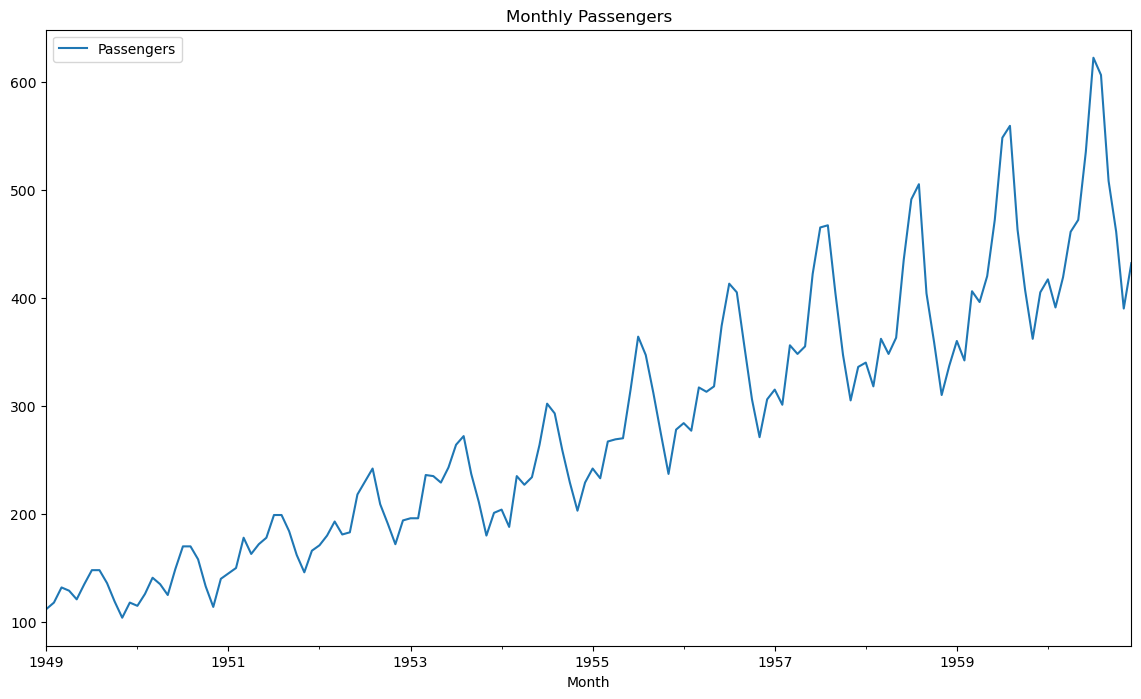

In [314]:
df.plot(figsize=(14,8),title = "Monthly Passengers")

In [315]:
data = df["Passengers"].values

In [316]:
data[0:5]

array([112., 118., 132., 129., 121.])

In [317]:
type(data[0:5])

numpy.ndarray

In [318]:
type(data[0])

numpy.float64

In [319]:
data = data.astype("float32")

In [320]:
type(data[0])

numpy.float32

In [321]:
data.shape

(144,)

In [322]:
data = data.reshape(-1,1)

In [323]:
data.shape

(144, 1)

In [324]:
def split_data(dataFrame, test_Size):
    position = int(round(len(dataFrame)*(1-test_Size)))
    train = dataFrame[:position]
    test = dataFrame[position:]
    return train, test,position

In [325]:
train, test,position = split_data(data,0.33)

In [326]:
print(train.shape, test.shape)

(96, 1) (48, 1)


In [327]:
scaler_train = MinMaxScaler(feature_range=(0,1))

In [328]:
train = scaler_train.fit_transform(train)

In [329]:
scaler_test = MinMaxScaler(feature_range=(0,1))

In [330]:
test = scaler_test.fit_transform(test)

In [331]:
train[0:5]

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619]], dtype=float32)

In [332]:
test[0:5]

array([[0.04361373],
       [0.        ],
       [0.17133951],
       [0.1464175 ],
       [0.16822433]], dtype=float32)

In [333]:
def create_features(data,lookback):
    x,y = [],[]
    for i in range(lookback,len(data)):
        x.append(data[i-lookback:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

In [334]:
lookback = 1

In [335]:
# Train Veri Seti
x_train, y_train = create_features(train,lookback)

In [336]:
# Test Veri Seti
x_test, y_test = create_features(test,lookback)

In [337]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(95, 1) (95,) (47, 1) (47,)


In [338]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [339]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(95, 1, 1) (95, 1) (47, 1, 1) (47, 1)


## Modelleme

In [340]:
model = Sequential()
model.add(SimpleRNN(units=50,
                    activation="relu",
                    input_shape=(x_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [341]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [342]:
# Optimizasyon ve Değerlendirme Metrikleri Ayarlanması
model.compile(loss="mean_squared_error",optimizer="adam")

In [343]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3,verbose=1 ,mode="min"),
             ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",save_best_only=True,save_weights_only=False,verbose=1)]

In [344]:
history = model.fit(x=x_train,
                    y= y_train,
                    epochs=50,
                    batch_size=1,
                    validation_data=(x_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/50
62/95 [==================>...........] - ETA: 0s - loss: 0.0048  
Epoch 1: val_loss improved from inf to 0.02586, saving model to mymodel.h5
95/95 [==============================] - 1s 3ms/step - loss: 0.0108 - val_loss: 0.0259
Epoch 2/50
64/95 [===================>..........] - ETA: 0s - loss: 0.0102
Epoch 2: val_loss improved from 0.02586 to 0.02181, saving model to mymodel.h5
95/95 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0218
Epoch 3/50
63/95 [==================>...........] - ETA: 0s - loss: 0.0068
Epoch 3: val_loss improved from 0.02181 to 0.02076, saving model to mymodel.h5
95/95 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0208
Epoch 4/50
62/95 [==================>...........] - ETA: 0s - loss: 0.0060
Epoch 4: val_loss did not improve from 0.02076
95/95 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0217
Epoch 5/50
61/95 [==================>...........] - ETA: 0s - loss: 0.

## Değerlendirme

In [345]:
loss = model.evaluate(x_test,y_test,batch_size=1)
print("\nTest loss: %1f%%" % (100*loss))

47/47 [==============================] - 0s 685us/step - loss: 0.0211

Test loss: 2.109301%


In [346]:
train_predict = model.predict(x_train)

3/3 [==============================] - 0s 1ms/step


In [347]:
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [348]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

In [349]:
y_train = scaler_train.inverse_transform(y_train)
y_test = scaler_test.inverse_transform(y_test)

In [350]:
# Train veri setine ait RMSE değeri
train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))

In [351]:
# Test veri setine ait RMSE değeri
test_rmse = np.sqrt(mean_squared_error(y_test,test_predict))

In [352]:
print(f"Train RMSE: {train_rmse}")

Train RMSE: 23.45724868774414


In [353]:
print(f"Test RMSE: {test_rmse}")

Test RMSE: 46.62023162841797


In [354]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [358]:
train_prediction_df = result_df[lookback:position]

In [360]:
train_prediction_df["Predicted"] = train_predict

In [361]:
train_prediction_df.head()

,Passengers,Predicted
Month,,
1949-02-01,118.0,129.422470
1949-03-01,132.0,133.318283
1949-04-01,129.0,144.510620
1949-05-01,121.0,141.953720
1949-06-01,135.0,135.309235


In [364]:
test_prediction_df = result_df[position+lookback:]
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

,Passengers,Predicted
Month,,
1957-02-01,301.0,331.102020
1957-03-01,356.0,323.242645
1957-04-01,348.0,367.543701
1957-05-01,355.0,359.902710
1957-06-01,422.0,366.588593
